# Feature Engineering and Exploratory Data Analysis of Diabetes Dataset

This notebook performs
* Data preprocessing
* Exploratory analysis of the data 
* Using the Lasso method for parameter selection (Selecting those features which have large impacts on the output)

Parametric approach unlike KNN classifier. It's a regularization technique used to avoid overfitting

In [1]:
# importing all libraries
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# import and load the dataset
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()
print(diabetes.data.shape)

(442, 10)


In [3]:
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - Age
      - Sex
      - Body mass index
      - Average blood pressure
      - S1
      - S2
      - S3
      - S4
      - S5
      - S6

Note: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times `n_samples` (i.e. the sum of squares of each column totals 1).

Source URL:
http://www4.stat.ncsu.edu/~boos/var.select/diabetes.html

For more information see:
Brad

In [4]:
# attributes
print(diabetes.feature_names)

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']


In [5]:
# fit a linear model and calculate R-square
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
X_train_sk, X_test_sk, y_train_sk, y_test_sk = train_test_split(diabetes.data, diabetes.target, random_state=0)
lr = LinearRegression().fit(X_train_sk,y_train_sk)
lr.score(X_train_sk, y_train_sk)

0.555437148935302

In [6]:
# feature selection using Lasso
from sklearn.linear_model import Lasso
lasso = Lasso().fit(X_train_sk,y_train_sk)
lasso.score(X_train_sk,y_train_sk)

0.41412544493966097

In [7]:
lasso.score(X_test_sk,y_test_sk)

0.27817828862078764

In [8]:
# number of attributes used
np.sum(lasso.coef_ != 0)

2

In [9]:
lasso.coef_

array([  0.        ,  -0.        , 442.67992538,   0.        ,
         0.        ,   0.        ,  -0.        ,   0.        ,
       330.76014648,   0.        ])

### 2 features have the most impact in default setting of Lasso model-
* BMI
* S5

It would produce accurate predictions for future patients indicating which attributes are important factors in disease progression

## Now using the raw dataset which is usually the case in real-world databases

In [13]:
# Load the original dataset
# input variables
X = np.genfromtxt('diabetes.data',skip_header=1,usecols=range(10))
X.shape

(442, 10)

## Data Cleaning and Preprocessing
### Analyze the dataset
See the values

In [11]:
X[:2]

array([[ 59.    ,   2.    ,  32.1   , 101.    , 157.    ,  93.2   ,
         38.    ,   4.    ,   4.8598,  87.    ],
       [ 48.    ,   1.    ,  21.6   ,  87.    , 183.    , 103.2   ,
         70.    ,   3.    ,   3.8918,  69.    ]])

In [12]:
# output
y = np.genfromtxt('diabetes.data',skip_header=1,usecols=10)
y[:2]

array([151.,  75.])

In [14]:
# divide the observations into train and test samples
X_train_orig, X_test_orig, y_train, y_test = train_test_split(X, y, random_state=0)
lr = LinearRegression().fit(X_train_orig,y_train)
lr.score(X_train_orig, y_train)

0.5554337250189862

In [15]:
lasso = Lasso().fit(X_train_orig,y_train)
lasso.score(X_train_orig,y_train)

0.5495927275220449

In [16]:
lasso.score(X_test_orig,y_test)

0.3426973018813806

In [17]:
# there is difference in the features being used between the original
# dataset and the one loaded from scikit-learn
np.sum(lasso.coef_ != 0)

9

In [18]:
lasso.coef_

array([ -0.1256873 , -14.66777611,   6.6827205 ,   1.00125059,
         0.33753565,  -0.54918943,  -1.38498537,   0.        ,
        32.38598456,   0.15747148])

### There is difference in the features being used between the original raw dataset and the one loaded from scikit-learn

## Visualizing the dataset
Finding relationships from the graphs

Text(0.5, 0, 'Age')

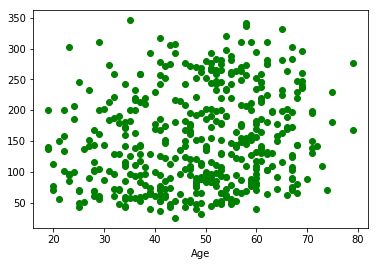

In [27]:
plt.plot(X[:,0],y[:],'go')
plt.xlabel('Age')

No specific relation between 'Age' & Output

Text(0.5, 0, 'BMI')

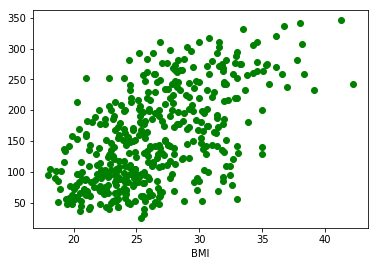

In [28]:
plt.plot(X[:,2],y[:],'go')
plt.xlabel('BMI')

There seems to be linear relationship

Text(0.5, 0, 'S5')

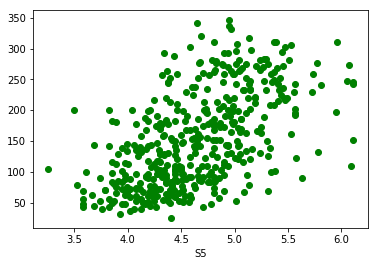

In [29]:
plt.plot(X[:,8],y[:],'go')
plt.xlabel('S5')

Again positive linear relationship

## Check for any Incorrect or Missing value
If any then-
* Remove records with missing values
* Replace incorrect values

In [26]:
print(np.isnan(X).any())

False


No missing value

## Check for anomalies
* Check whether the variable is continuos or discrete
* Check minimum, maximum, mean and deviation

(array([19., 28., 47., 53., 55., 85., 69., 47., 33.,  6.]),
 array([19., 25., 31., 37., 43., 49., 55., 61., 67., 73., 79.]),
 <a list of 10 Patch objects>)

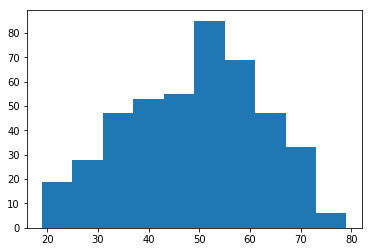

In [30]:
plt.hist(X[:,0])
# Continuos

(array([235.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 207.]),
 array([1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. ]),
 <a list of 10 Patch objects>)

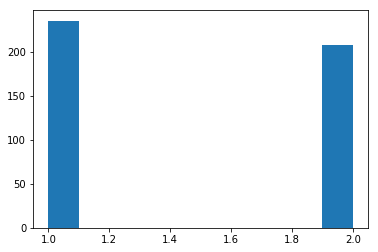

In [32]:
plt.hist(X[:,1])
# Discrete values

## Normalize the data

In [33]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train_orig)
X_train = scaler.transform(X_train_orig)
X_test = scaler.transform(X_test_orig)
X_train_442 = X_train / np.sqrt(442)
X_test_442 = X_test / np.sqrt(442)

In [34]:
lasso = Lasso().fit(X_train_442,y_train)
lasso.score(X_train_442,y_train)

0.4092192241478434

(array([14., 23., 43., 38., 44., 63., 52., 30., 19.,  5.]),
 array([-0.10598544, -0.08444121, -0.06289699, -0.04135276, -0.01980854,
         0.00173569,  0.02327991,  0.04482414,  0.06636836,  0.08791259,
         0.10945681]),
 <a list of 10 Patch objects>)

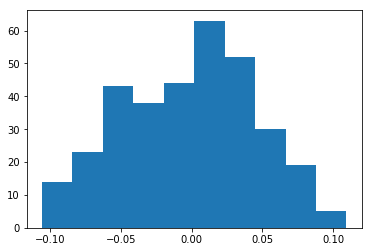

In [35]:
# normalized data
plt.hist(X_train_442[:,0])
#regression/continuos

In [36]:
lasso.score(X_test_442,y_test)

0.27548240879080854

In [37]:
# now same result
np.sum(lasso.coef_ != 0)

2

In [38]:
lasso.coef_

array([  0.        ,  -0.        , 447.80297025,   0.        ,
         0.        ,   0.        ,  -0.        ,   0.        ,
       329.9482957 ,   0.        ])

In [39]:
lasso = Lasso(alpha=20,max_iter=100000).fit(X_train,y_train)
print(lasso.score(X_train,y_train))
print(np.sum(lasso.coef_ != 0))

0.4184573667612984
2


In [40]:
alphas = np.array([0.1, 0.5, 1, 2, 5, 10, 20]) # the alphas to try
k = alphas.size  # the number of alphas
scores = np.zeros(k)  # initializing the score (R^2) for each alpha
used = np.zeros(k)  # initializing the number of used feaures for each alpha
for i in range(k):
  lasso = Lasso(alpha=alphas[i],max_iter=100000).fit(X_train,y_train)
  scores[i] = lasso.score(X_test, y_test)
  used[i] = np.sum(lasso.coef_ != 0)

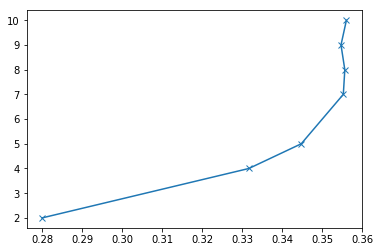

In [41]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(scores, used, marker='x')

In [42]:
param_grid = {'alpha': [0.01, 0.02, 0.05, 0.1, 0.2, 0.5, 1, 2, 5, 10, 20, 50, 100]}
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(Lasso(), param_grid, cv=5)
grid_search.fit(X_train, y_train)
grid_search.score(X_test, y_test)

/home/handabaldeep/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


0.35531166244816026

In [43]:
grid_search.score(X_train, y_train)

0.5487049188413291

In [44]:
print(np.sum(grid_search.best_estimator_.coef_ != 0))

7


In [45]:
print(grid_search.best_estimator_.coef_ != 0)

[False  True  True  True  True  True  True False  True False]
